In [29]:
"""
Created on Sat Jun 23 14:04:29 2018

@author: abhishekkumar
"""
#REGULAR IMPORTS AND FILE ASSOCIATION

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


training_data=pd.read_csv('train.csv')

#Imputing Loan_status because Logistic regression expects all variables in numeric form.
training_data['Loan_Status_Converted']= training_data['Loan_Status'].replace(['Y','N'],[1,0])


# Some exploratory data analysis to understand the data set better.

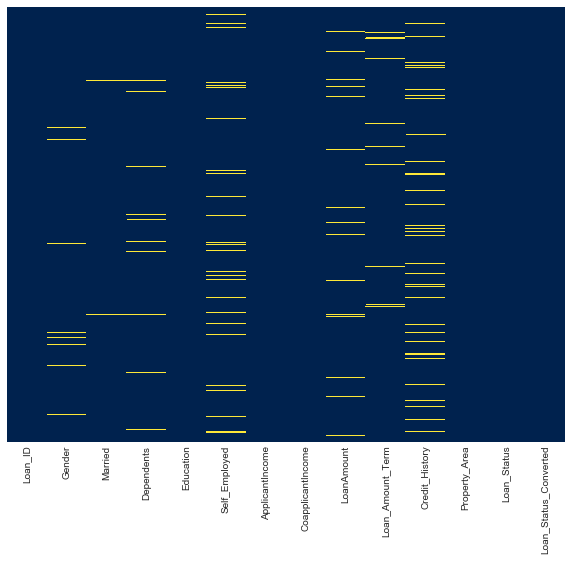

In [30]:
plt.figure(figsize = (10,8))
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap='cividis')

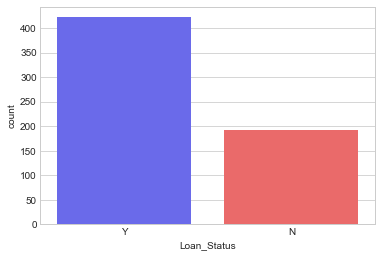

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',data=training_data,palette='seismic')

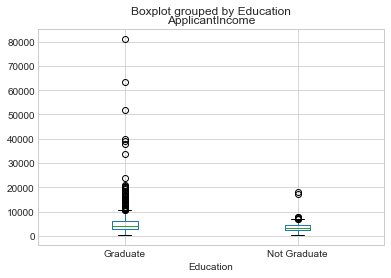

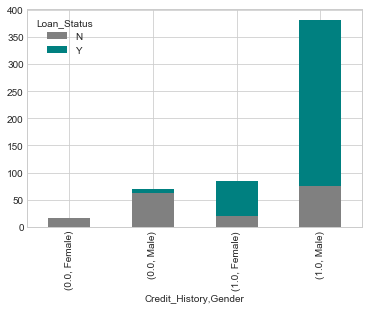

In [32]:
#Checking Missing Values
training_data.apply(lambda x: sum(x.isnull()))

#Descriptive Stats for analyzing data
training_data.describe()
training_data['Property_Area'].value_counts()
training_data.boxplot('ApplicantIncome','Education')
training_data['Credit_History'].value_counts()
training_data['Loan_Status'].value_counts()

training_data.pivot_table(values='Loan_Status_Converted',index='Credit_History').transpose()
pd.crosstab(training_data['Credit_History'],[training_data['Loan_Status'],training_data['Gender']])
cross_var = pd.crosstab([training_data['Credit_History'],training_data['Gender']],training_data['Loan_Status'])
cross_var.plot(kind='bar', stacked=True, color=['gray','teal'])

pd.crosstab(training_data['Self_Employed'],training_data['Loan_Status'],margins=True)
training_data.pivot_table('LoanAmount','Self_Employed','Education',np.median)


training_data['Self_Employed'].fillna('No',inplace=True)

training_data.pivot_table('Loan_Amount_Term','Property_Area','Gender',np.mean)

# Replacing values from pivot table in to actual dataFrame
temp_pivot = training_data.pivot_table('LoanAmount','Self_Employed','Education',np.median)
def impute_loan(x):
    return temp_pivot.loc[x['Self_Employed'],x['Education']]
training_data['LoanAmount'].fillna(training_data[training_data['LoanAmount'].isnull()].apply(impute_loan,axis=1),inplace=True)




temp_pivot


temp_pivot.iloc[0,1]

temp_pivot.loc['No']['Not Graduate']

temp_pivot.iloc[0]

temp_pivot.loc['No']
training_data.pivot_table('Loan_Amount_Term','Property_Area','Gender',np.mean)


training_data['Total_Income']=training_data['ApplicantIncome']+training_data['CoapplicantIncome']

In [33]:
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Converted,Total_Income
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.764658,342.00000,0.842199,0.687296,7024.705081
std,6109.041673,2926.248369,84.145700,65.12041,0.364878,0.463973,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,0.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,81000.000000


In [34]:
training_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
training_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [36]:
training_data['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
training_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [45]:
training_data.apply(lambda x: sum(x.isnull()))

Loan_ID                   0
Gender                   13
Married                   3
Dependents               15
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term         14
Credit_History           50
Property_Area             0
Loan_Status               0
Loan_Status_Converted     0
Total_Income              0
dtype: int64

In [39]:
training_data['Total_Income']=training_data['ApplicantIncome']+training_data['CoapplicantIncome']

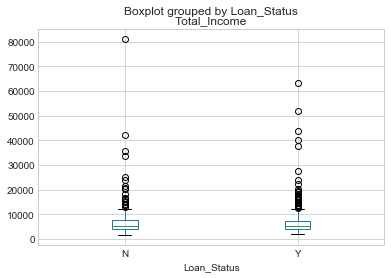

In [40]:
training_data.boxplot('Total_Income','Loan_Status')

In [41]:
training_data.pivot_table('Credit_History','Property_Area',np.count_nonzero)

,0,1
Property_Area,,
Rural,NaN,0.830303
Semiurban,NaN,0.861751
Urban,1.0,0.828729


In [42]:
training_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status_Converted,Total_Income
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.764658,342.00000,0.842199,0.687296,7024.705081
std,6109.041673,2926.248369,84.145700,65.12041,0.364878,0.463973,6458.663872
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.00000,1.000000,0.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,81000.000000


Text(0,0.5,'Loan Amount')

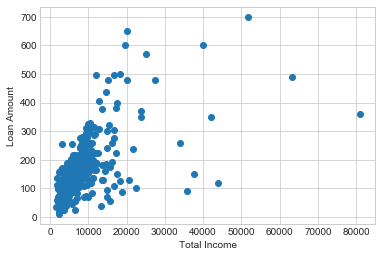

In [43]:
canvas, figures = plt.subplots(1)
figures.scatter(training_data['Total_Income'],training_data['LoanAmount'])
figures.set_xlabel('Total Income')
figures.set_ylabel('Loan Amount')

In [44]:
temp_pivot



Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0
